# Análisis Exploratorio de Datos (EDA) - Stroke Dataset.
Este notebook contiene un análisis exploratorio paso a paso del dataset de predicción de ictus (stroke), siguiendo una estructura clara, visual y comentada.

## Paso 1: Carga del dataset y primeras inspecciones

In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("stroke_dataset.csv")

# Mostrar las primeras filas
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [2]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [3]:
# Estadísticas descriptivas de variables numéricas
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


## Limpieza y verificación de datos

In [4]:
# Verificar valores nulos por columna
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
# Verificar duplicados
df.duplicated().sum()

np.int64(0)

## Análisis de desbalanceo de la variable objetivo

Fundamental es conocer la distribución de la variable `stroke` para decidir si debemos aplicar técnicas de balanceo más adelante.

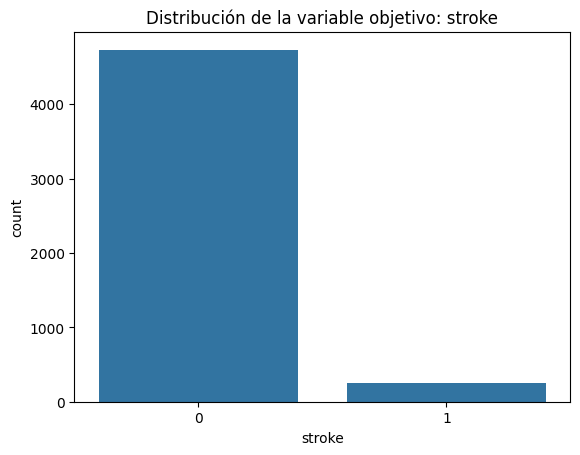

stroke
0    95.02108
1     4.97892
Name: proportion, dtype: float64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de valores de la variable objetivo
sns.countplot(x='stroke', data=df)
plt.title('Distribución de la variable objetivo: stroke')
plt.show()

# Porcentajes
df['stroke'].value_counts(normalize=True) * 100

## Análisis de variables categóricas

Distribución de frecuencias para cada variable categórica.

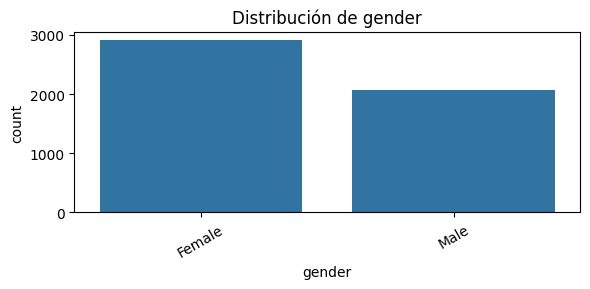

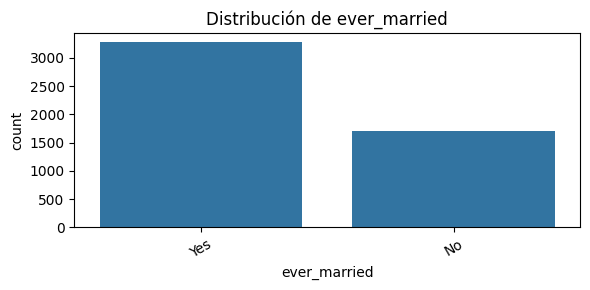

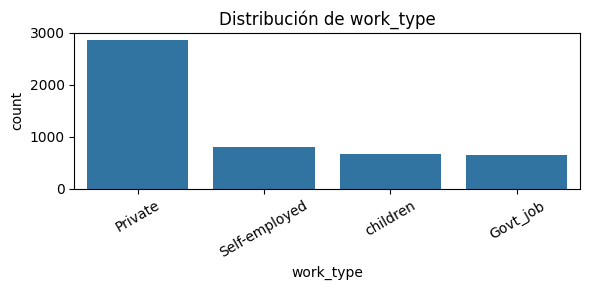

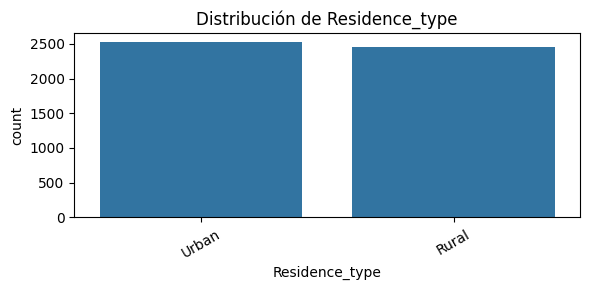

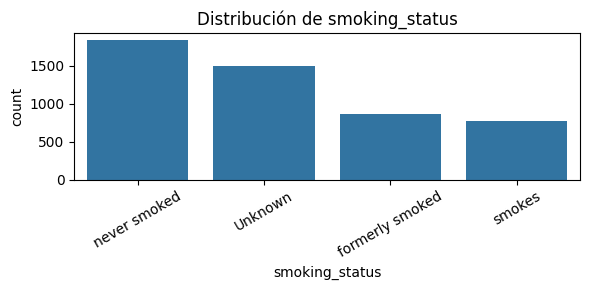

In [7]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

## Análisis de variables numéricas

Distribución de variables numéricas para detectar outliers y comprender mejor su comportamiento.

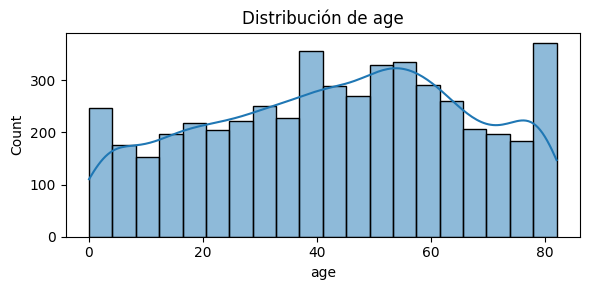

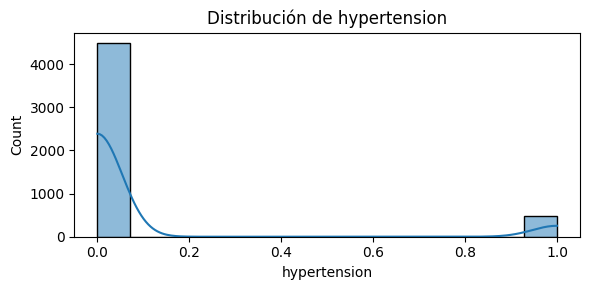

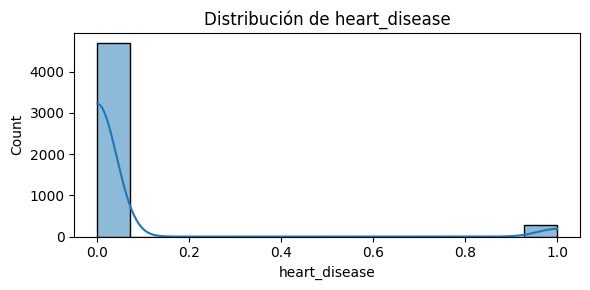

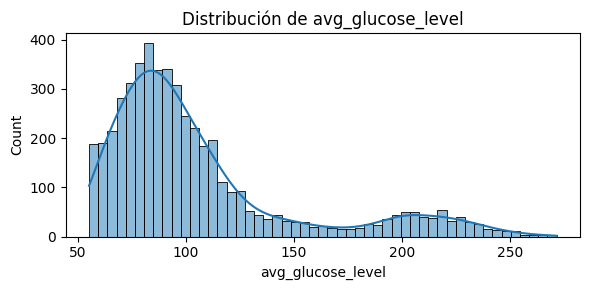

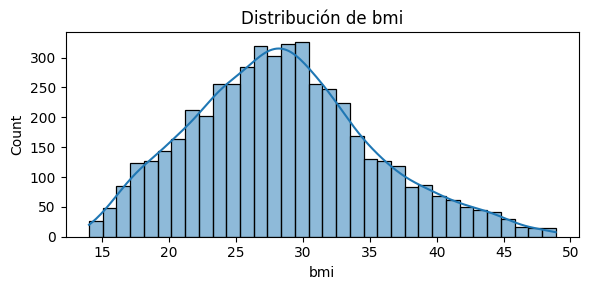

In [8]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('stroke')

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()
    plt.show()

## Análisis bivariado con la variable objetivo `stroke`

exploramos cómo se relacionan las variables explicativas con la variable objetivo `stroke`. Esto nos ayuda a identificar patrones o posibles predictores relevantes para el modelo.

#### Comparación de variables numéricas según `stroke`


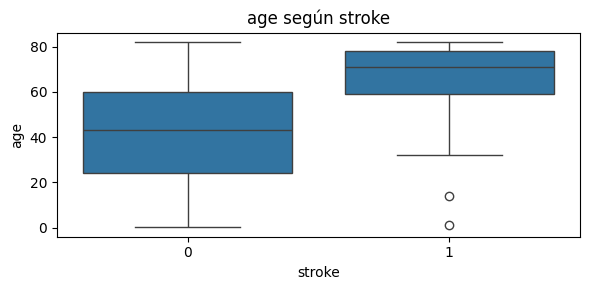

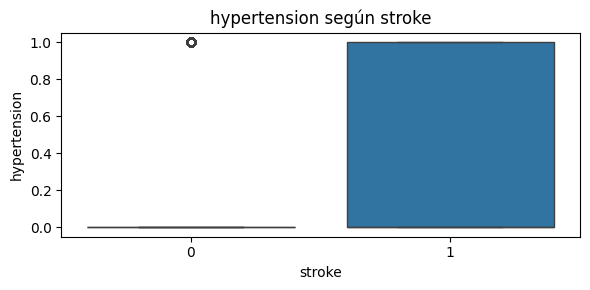

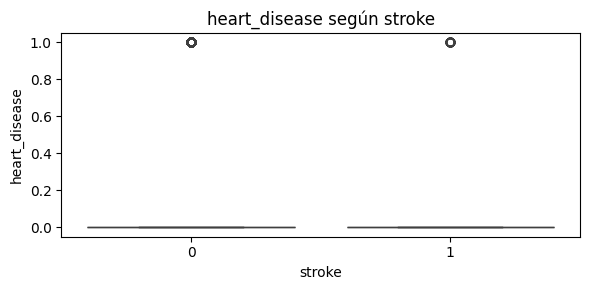

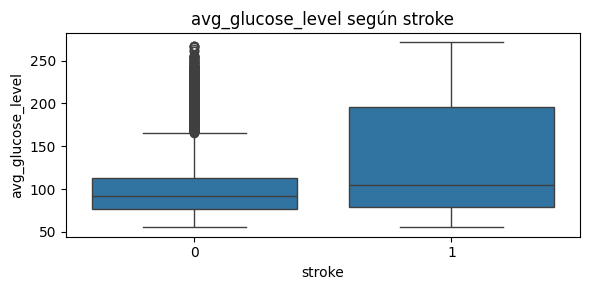

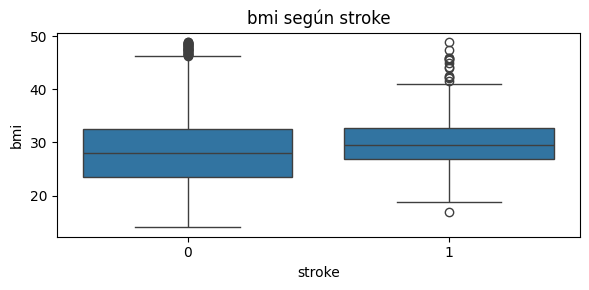

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x='stroke', y=col)
    plt.title(f'{col} según stroke')
    plt.tight_layout()
    plt.show()

#### Distribución de variables categóricas según `stroke`

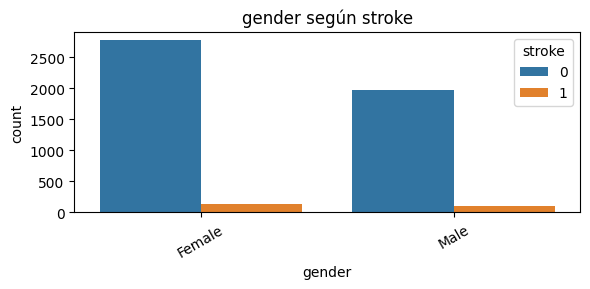

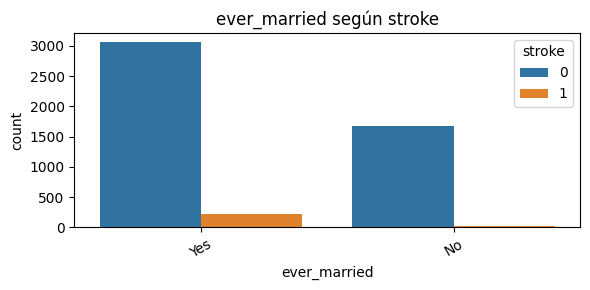

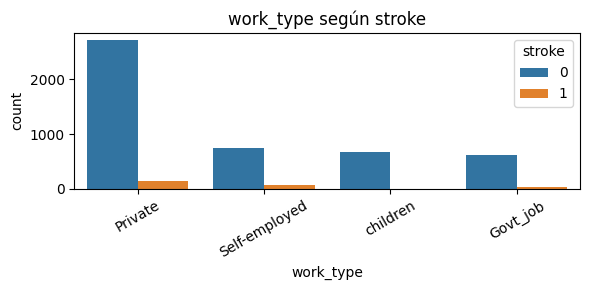

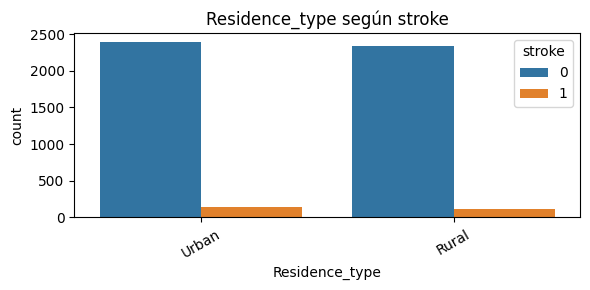

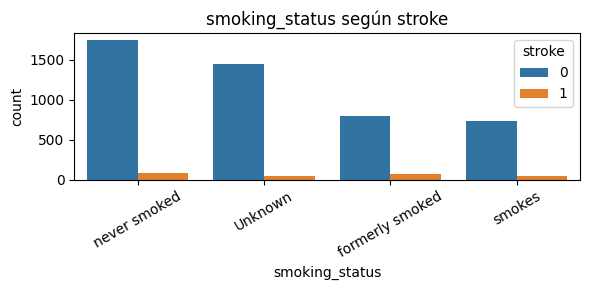

In [10]:
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue='stroke', order=df[col].value_counts().index)
    plt.title(f'{col} según stroke')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

## Análisis avanzado y creación de nuevas variables

Profundizamos en la estructura del dataset para detectar valores extremos, crear nuevas variables que puedan mejorar la capacidad predictiva del modelo y preparamos el terreno para el preprocesamiento.

#### Detección de posibles outliers en variables numéricas

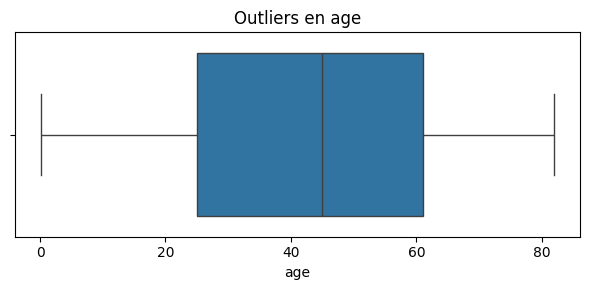

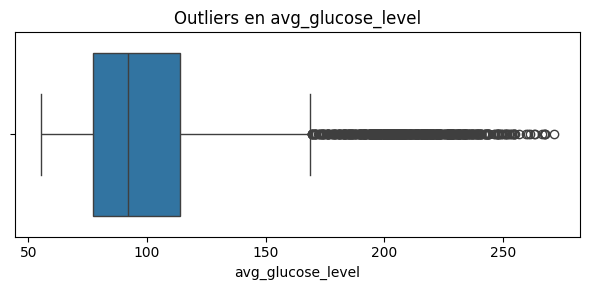

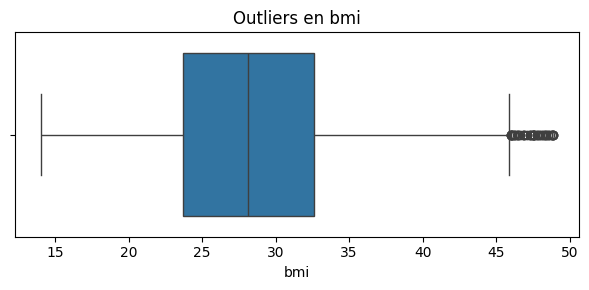

In [13]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers en {col}')
    plt.tight_layout()
    plt.show()

#### Creación de variable age_group

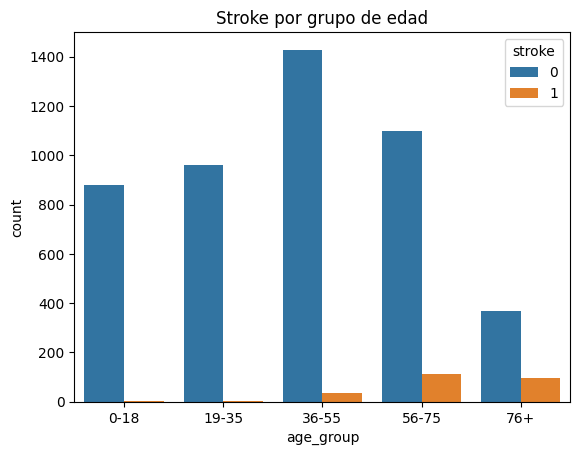

In [14]:
# Crear categorías de edad
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 55, 75, 100],
                         labels=['0-18', '19-35', '36-55', '56-75', '76+'])

# Visualizar distribución cruzada con stroke
sns.countplot(data=df, x='age_group', hue='stroke')
plt.title('Stroke por grupo de edad')
plt.show()

#### Análisis del valor 'Unknown' en `smoking_status`

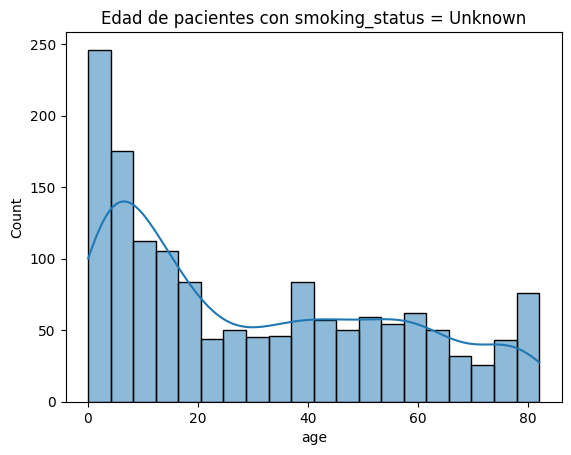

In [15]:
# Ver distribución por edad para valores Unknown en smoking_status
sns.histplot(data=df[df['smoking_status'] == 'Unknown'], x='age', bins=20, kde=True)
plt.title('Edad de pacientes con smoking_status = Unknown')
plt.show()

## Conclusiones del EDA

- La variable `stroke` está desbalanceada (~5%).
- Se detectan posibles outliers en edad, glucosa y BMI.
- Las variables `heart_disease` y `hypertension` están correlacionadas con stroke.
- Se ha creado la variable `age_group` con valor predictivo potencial.
- Hay un porcentaje importante de `Unknown` en `smoking_status`.